In [2]:
import numpy as np
import matplotlib.pyplot as plt
test=True

In [3]:
filename = 'test.txt' if test else 'input.txt'
with open(filename) as f:
    lines=f.readlines()
elv_map=np.array([list(line.strip()) for line in lines])
loc_to_ple = lambda loc: tuple([x[0] for x in loc])

start_pos=loc_to_ple(np.where(elv_map=='S'))
target_pos=loc_to_ple(np.where(elv_map=='E'))
if test: print(elv_map, start_pos, target_pos)

[['S' 'a' 'b' 'q' 'p' 'o' 'n' 'm']
 ['a' 'b' 'c' 'r' 'y' 'x' 'x' 'l']
 ['a' 'c' 'c' 's' 'z' 'E' 'x' 'k']
 ['a' 'c' 'c' 't' 'u' 'v' 'w' 'j']
 ['a' 'b' 'd' 'e' 'f' 'g' 'h' 'i']] (0, 0) (2, 5)


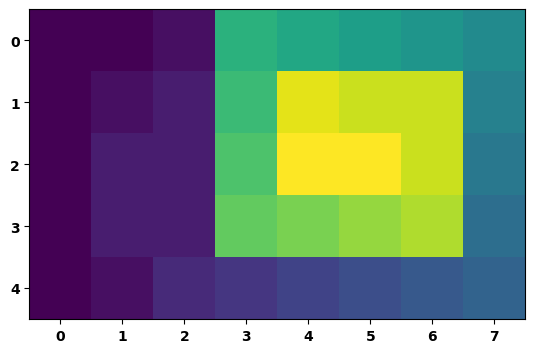

In [4]:
value_replacer = lambda x: 0 if x == 'S' else( 25 if x == 'E' else ord(x)-97)
value_replacer = np.vectorize(value_replacer)
elv_map=value_replacer(elv_map)
if test: plt.imshow(elv_map, interpolation=None)

In [5]:
def find_reachable(elv_map, pos):
    current = elv_map[pos]
    reachable = []
    for offset in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        loc = pos[0] + offset[0], pos[1] + offset[1]
        try:
            if elv_map[loc] <= current and loc[0] >= 0 and loc[1] >= 0:
                reachable.append((loc))
        except IndexError:
            pass
    return reachable

In [9]:
locs=[start_pos]
for i in range(10):
    locs_new=[]
    for loc in locs:
        locs_temp=find_reachable(elv_map,loc)
        for loc_temp in locs_temp:
            if not loc_temp in locs_new:
                locs_new+=loc_temp
    if target_pos in locs_new: break
    locs=locs_new

print(f'{locs = } \n {locs_new = }')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
print(f'{loc_temp = } \n {locs_temp = } \n {locs_new = }')


NameError: name 'loc_temp' is not defined

In [ ]:
loc_temp in locs_temp

True